# Вариант №4

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error


df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Разведочный анализ EDA

In [4]:
y_eda = df['Sleep Duration']

x_eda = df.drop(columns=['Sleep Duration', 'id'])
print(x_eda.describe(include = 'all'))

       Gender           Age    City Profession  Academic Pressure  \
count   27901  27901.000000   27901      27901       27901.000000   
unique      2           NaN      52         14                NaN   
top      Male           NaN  Kalyan    Student                NaN   
freq    15547           NaN    1570      27870                NaN   
mean      NaN     25.822300     NaN        NaN           3.141214   
std       NaN      4.905687     NaN        NaN           1.381465   
min       NaN     18.000000     NaN        NaN           0.000000   
25%       NaN     21.000000     NaN        NaN           2.000000   
50%       NaN     25.000000     NaN        NaN           3.000000   
75%       NaN     30.000000     NaN        NaN           4.000000   
max       NaN     59.000000     NaN        NaN           5.000000   

        Work Pressure          CGPA  Study Satisfaction  Job Satisfaction  \
count    27901.000000  27901.000000        27901.000000      27901.000000   
unique           

Выведем распределение депресии и разбор по депресии и длительности сна

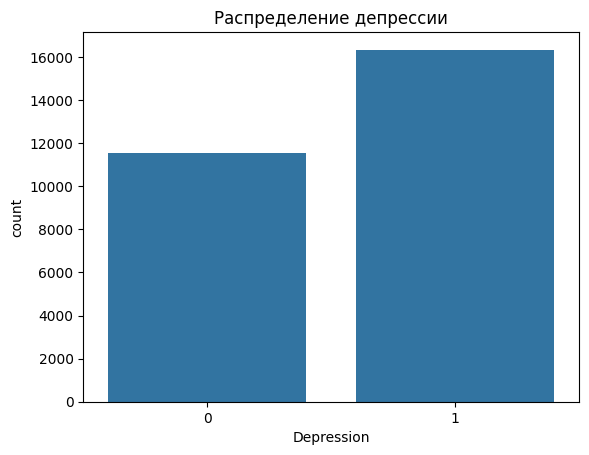

            count unique                  top  freq
Depression                                         
0           11565      5          '7-8 hours'  2975
1           16336      5  'Less than 5 hours'  5361


In [5]:
sns.countplot(data=df, x="Depression")
plt.title("Распределение депрессии")
plt.show()

print(df.groupby("Depression")['Sleep Duration'].describe())

В наборе явное преобладание депрессии. Количество людей с признаками депрессии значительно превышает число людей без депрессии.

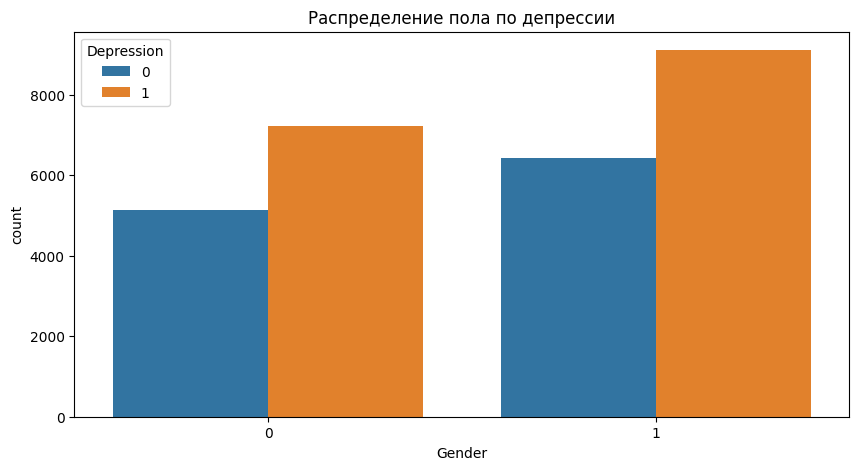

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Распределение пола по депрессии')
plt.show()

Распределение по полу и депрессии показывает, что мужчины имеют несколько более высокую склонность к депрессии по сравнению с женщинами.

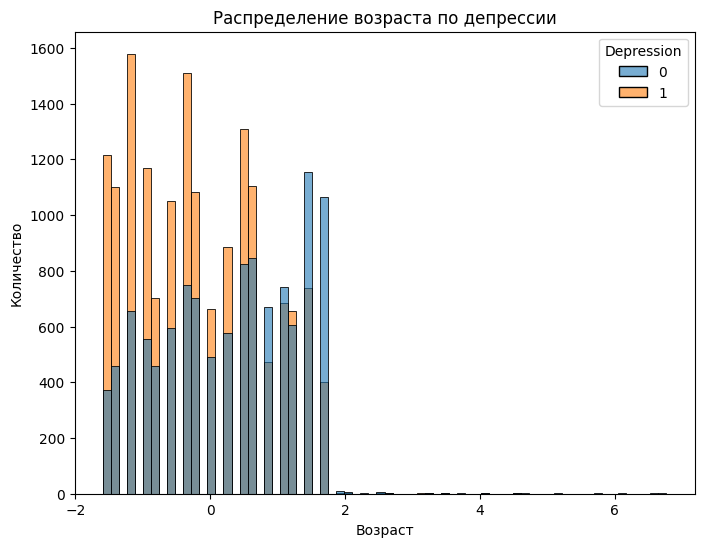

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Depression', alpha=0.6)
plt.title('Распределение возраста по депрессии')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

По распределению возраста, можем заметить, что признаки депрессии заметны преимущественно у молодых людей до 30 лет. После этого возраста симптомы депрессии сильно не проявляются, что указывает на склонность депрессии к более молодой возрастной группе.

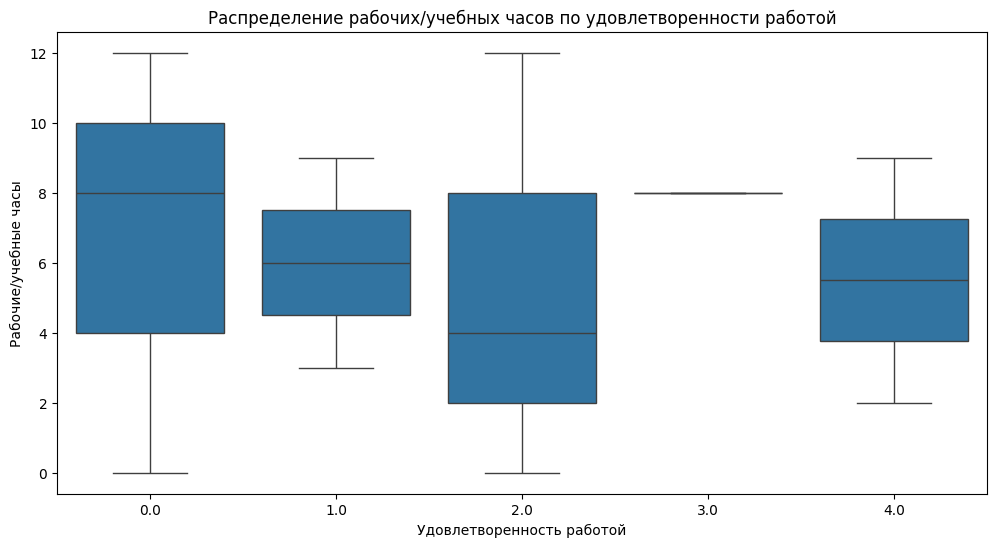

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Job Satisfaction", y="Work/Study Hours")
plt.title("Распределение рабочих/учебных часов по удовлетворенности работой")
plt.xlabel("Удовлетворенность работой")
plt.ylabel("Рабочие/учебные часы")
plt.show()

По распределению рабочих/учебных часов в зависимости от удовлетворенности работой, можно заметить, что наиболее высокая продолжительность рабочего времени (10-12 часов) наблюдается при низком уровне удовлетворенности работой (0-1 балл). С увеличением удовлетворенности до 2-3 баллов рабочее время стабилизируется на уровне 6-8 часов, при этом наиболее сбалансированный график (4-6 часов) характерен для максимальной удовлетворенности работой (4 балла). Это указывает на обратную зависимость между продолжительностью рабочего дня и уровнем удовлетворенности работой, где чрезмерная трудовая нагрузка ассоциирована со снижением удовлетворенности профессиональной деятельностью.

Выведем распределение уровня финансового стресса и разбор по уровню финансового стресса и длительности сна.

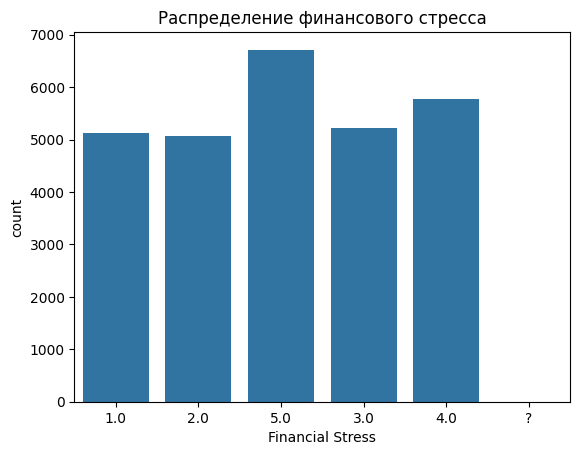

                 count unique                  top  freq
Financial Stress                                        
1.0               5121      5  'Less than 5 hours'  1636
2.0               5061      5  'Less than 5 hours'  1390
3.0               5226      5  'Less than 5 hours'  1502
4.0               5775      5  'Less than 5 hours'  1635
5.0               6715      5  'Less than 5 hours'  2146
?                    3      2          '5-6 hours'     2


In [10]:
sns.countplot(data=df, x="Financial Stress")
plt.title("Распределение финансового стресса")
plt.show()

print(df.groupby("Financial Stress")['Sleep Duration'].describe())

Датасет несбалансирован по уровню финансового стресса, так как количество человек с разными уровнями стресса значительно отличается. Наибольшее количество наблюдений сосредоточено на уровнях стресса 1.0 и 2.0, в то время как экстремально высокие уровни финансового стресса (4.0 и 7.0) представлены минимальным количеством респондентов.

С увеличением уровня финансового стресса наблюдается тенденция к снижению продолжительности сна, то есть чем выше финансовое давление, тем меньше времени уделяется сну.

Выведем корреляционную матрицу

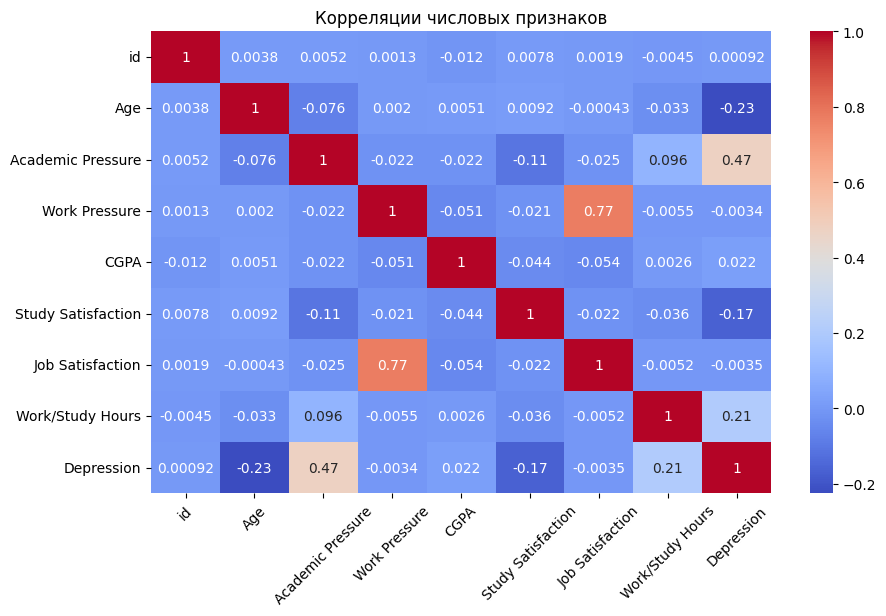

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Анализ числовых признаков

Анализируем 8 признаков против CGPA
Корреляции с CGPA:
id: -0.01
Age: 0.01
Academic Pressure: -0.02
Work Pressure: -0.05
Study Satisfaction: -0.04
Job Satisfaction: -0.05
Work/Study Hours: 0.00
Depression: 0.02


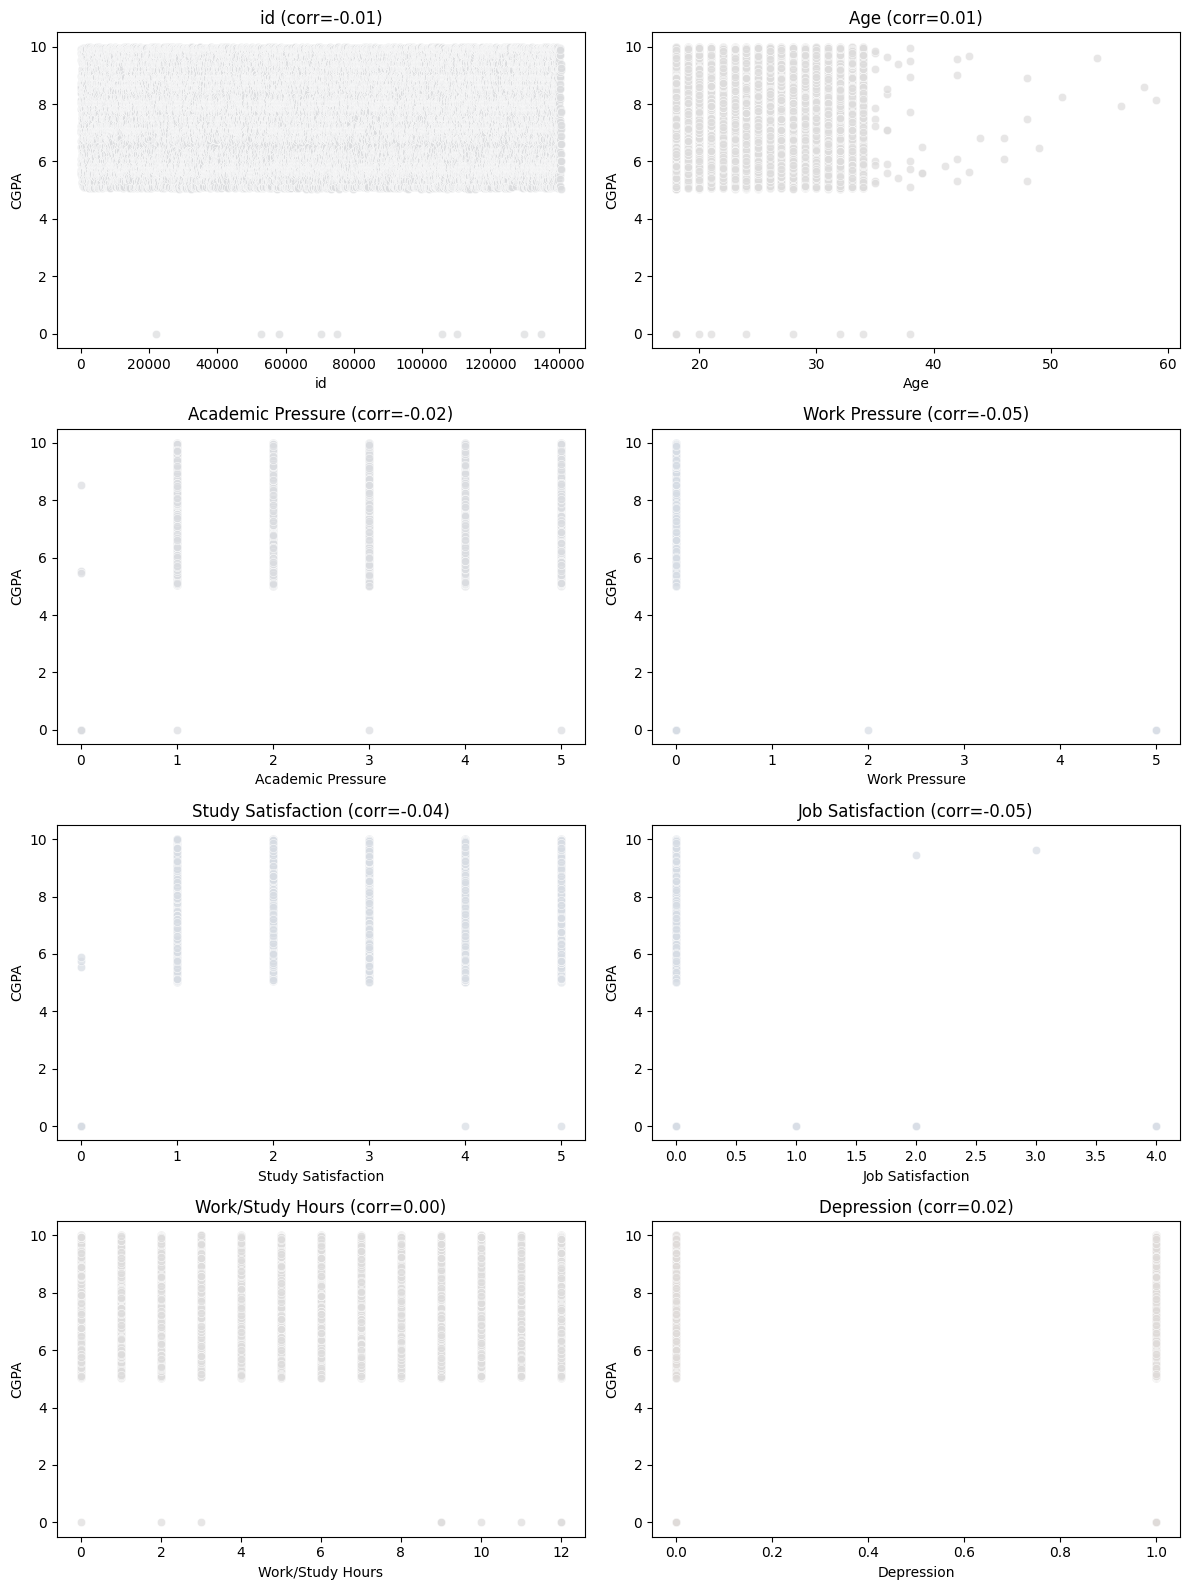

In [12]:
num_features = df.select_dtypes(include="number").columns
num_features = num_features[num_features != 'CGPA']
n = len(num_features)

print(f"Анализируем {n} признаков против CGPA")

corrs = df[num_features].corrwith(df["CGPA"])

print("Корреляции с CGPA:")
for col, corr in corrs.items():
    print(f"{col}: {corr:.2f}")

cmap = plt.colormaps["coolwarm"]

fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(12, 4*((n+1)//2)))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)

    sns.scatterplot(ax=axes[i], data=df, x=col, y="CGPA", color=color, alpha=0.7)
    axes[i].set_title(f"{col} (corr={corr:.2f})", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("CGPA", fontsize=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Размер данных: (27898, 18)


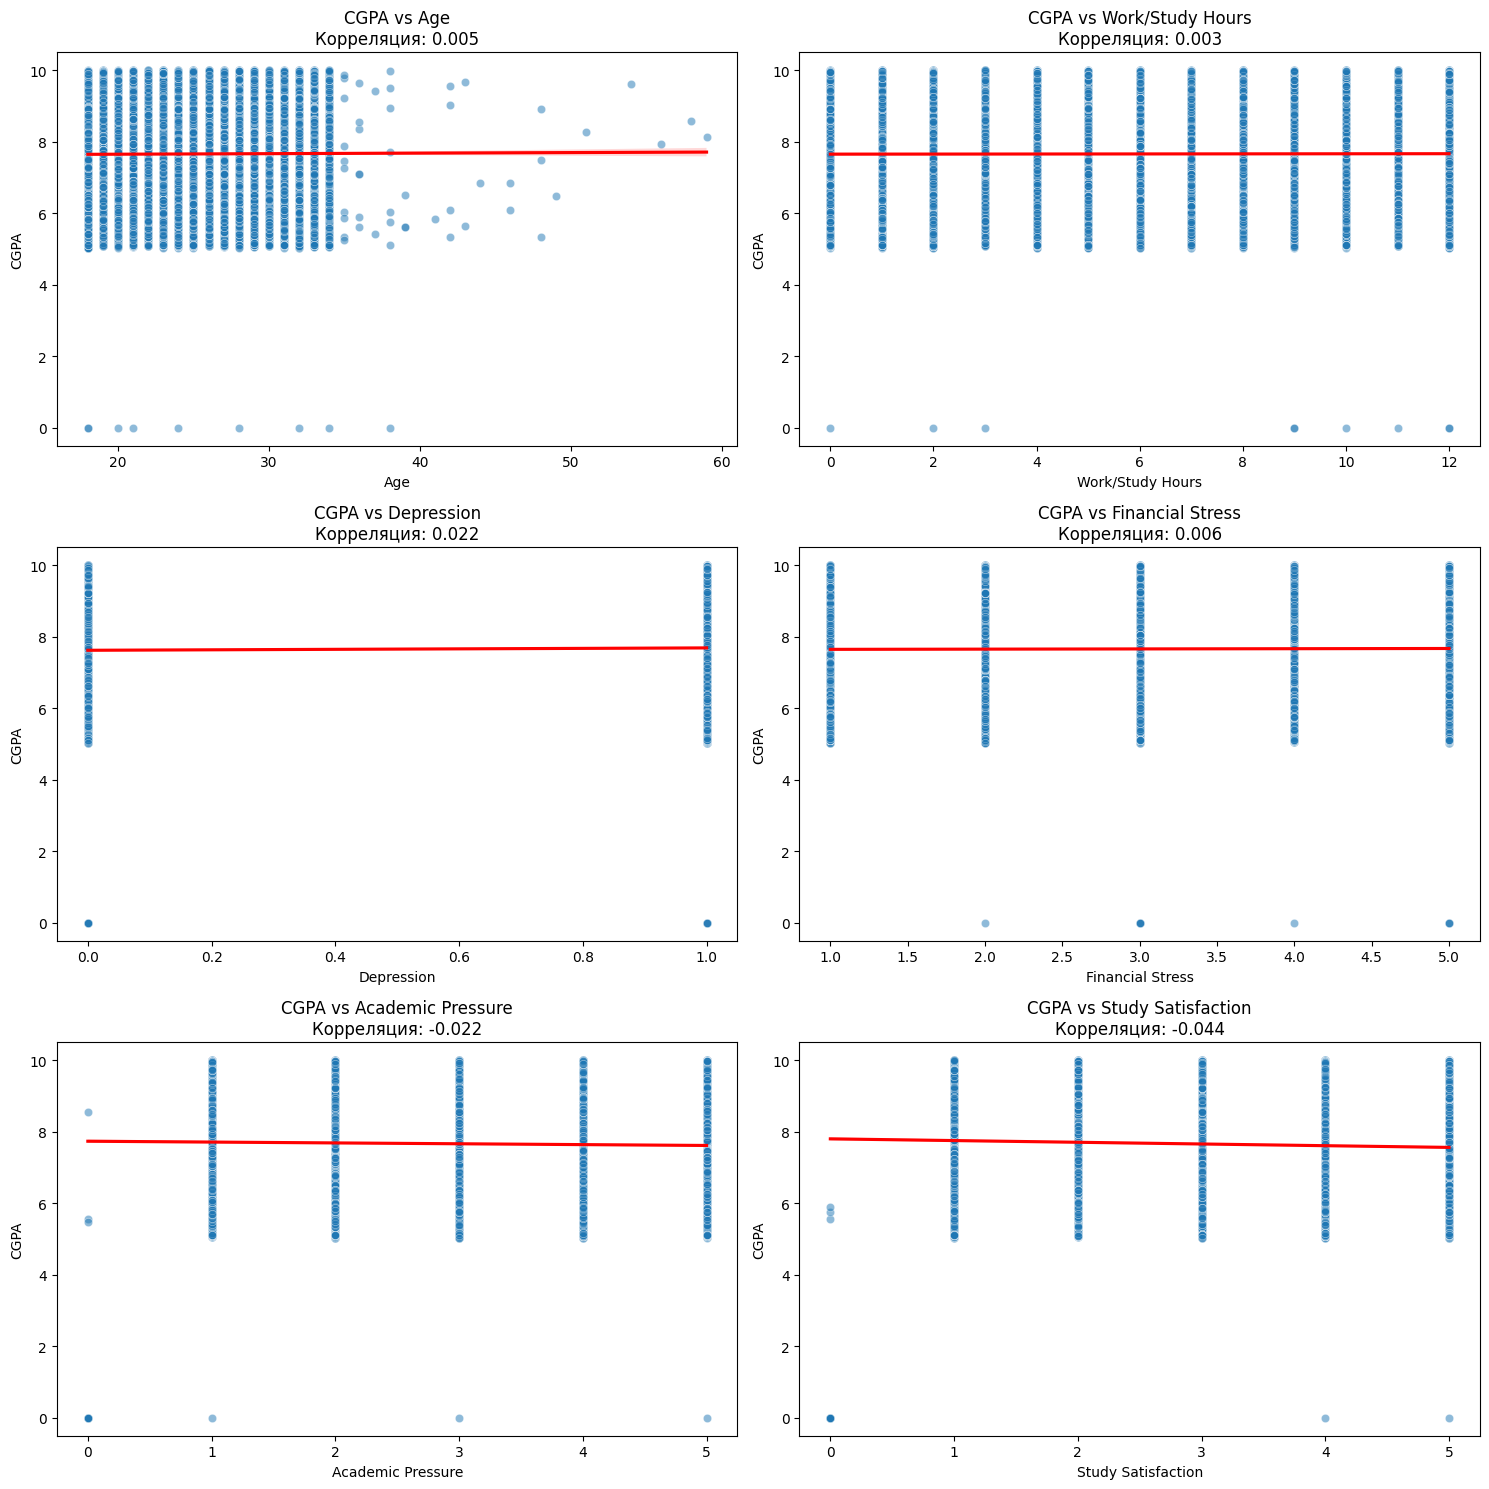

In [13]:
df_clean = df.copy()

numeric_cols = ['Age', 'Work/Study Hours', 'Depression', 'Financial Stress', 'Academic Pressure', 'Study Satisfaction', 'CGPA']

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean = df_clean.dropna(subset=numeric_cols)

print(f"Размер данных: {df_clean.shape}")

num_cols = ['Age', 'Work/Study Hours', 'Depression', 'Financial Stress', 'Academic Pressure', 'Study Satisfaction']

plt.figure(figsize=(15, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=col, y="CGPA", data=df_clean, alpha=0.5)
    sns.regplot(x=col, y="CGPA", data=df_clean, scatter=False, color="red")

    correlation = df_clean[col].corr(df_clean['CGPA'])
    plt.title(f"CGPA vs {col}\nКорреляция: {correlation:.3f}")

plt.tight_layout()
plt.show()

In [14]:
categorial_features = list(df.select_dtypes(include=['object']).columns)
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)

In [15]:
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = df['Financial Stress'].astype(float)

Отберём лучшие признаки

In [16]:
best_features = ["Academic Pressure", "Age", "Study Satisfaction", "Work/Study Hours", "Gender"]

In [17]:
binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
categorial_cols = [i for i in categorial_features if df[i].nunique() > 2]

In [18]:
le = LabelEncoder()
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [19]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[categorial_cols])
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [20]:
df = df.drop(categorial_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [21]:
numeric_cols_to_scale = [col for col in numeric_features if col not in ['id', 'Depression']]
scaler = StandardScaler()
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

In [22]:
X = df.drop("Depression", axis=1)
y = df.Depression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_best = df[best_features]
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.33, random_state=42)

In [23]:
def graph_coef(coefs, feature_names, title):
    plt.figure(figsize=(12, max(6, len(coefs)*0.3)))
    plt.barh(feature_names, coefs, color='skyblue', edgecolor='black')
    plt.xlabel('Коэффициенты')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def calculate_metrics(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    print('MAE %.3f' % MAE)

    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

    R2 = r2_score(y_true, y_pred)
    print('R2=%.3f' % R2)

    MSE = mean_squared_error(y_true, y_pred)
    print('MSE=%.3f' % MSE)

    RMSE = root_mean_squared_error(y_true, y_pred)
    print('RMSE=%.3f' % RMSE)

# Модель


Метрики для всей выборки:
MAE 0.347
MAPE=768986272105992.125, MAPE_as_percent=76898627210599216.000%
R2=0.300
MSE=0.170
RMSE=0.412


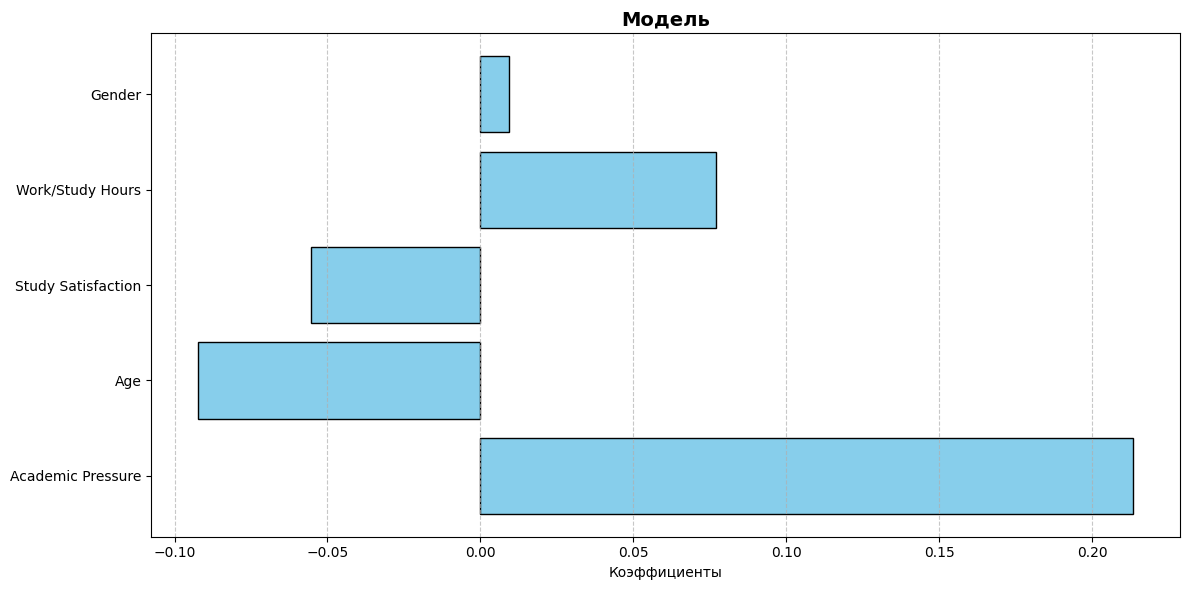

In [26]:
model = LinearRegression()
model.fit(X_best, y)
y_pred = model.predict(X_best)

print('Метрики для всей выборки:')
calculate_metrics(y, y_pred)
graph_coef(model.coef_, X_best.columns, "Модель")